In [1]:
import pandas as pd
data = pd.read_csv("/Users/emily/Desktop/A_Z Handwritten Data.csv")

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

print(data.head())

X = data.drop('0', axis = 1)
y = data['0']



   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


# Exploratory Data Analysis

In [17]:
import torchvision.transforms as transforms
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

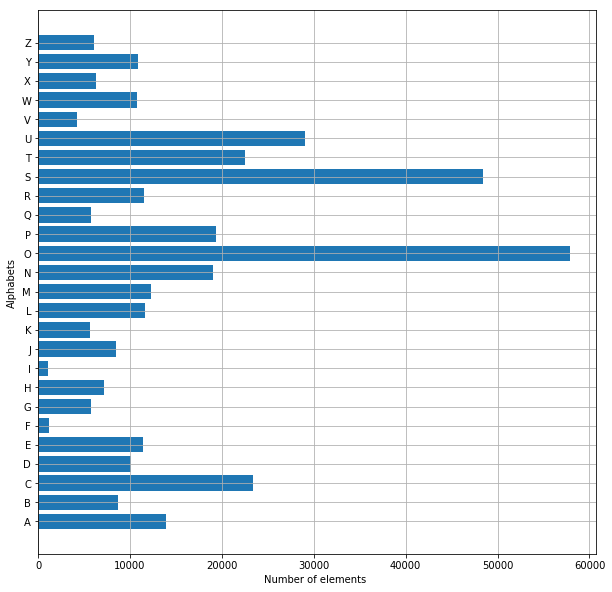

In [4]:
alphabet_counter = np.zeros(26, dtype='int')
y_int = np.int0(y)
y_int = np.int0(y)
for i in y_int:
    alphabet_counter[i] += 1
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, alphabet_counter)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


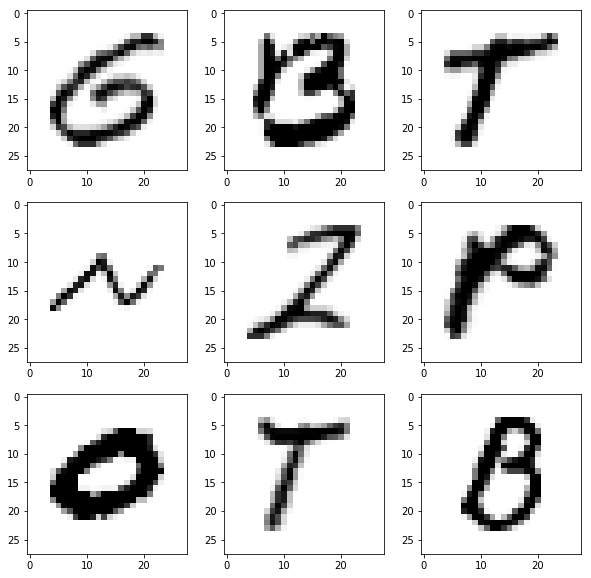

In [7]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
   # _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(train_x[i], (28,28)), cmap="Greys")
plt.show()

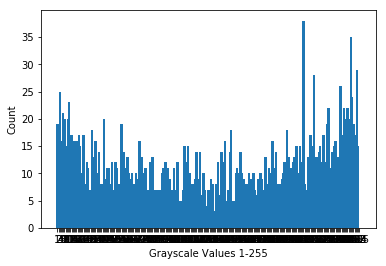

In [8]:
d = {}
for i in range(256):
    d[str(i)]=0
for e in train_x[:20]:
    for ee in e:
        #ca = np.bincount(ee)
        for i in range(255):
            d[str(i)]+=ee.tolist().count(i)
d.pop('0')
plt.bar(d.keys(),d.values(),2)
plt.xlabel("Grayscale Values 1-255")
plt.ylabel("Count")
plt.show()

# Model Class Definition

In [9]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        self.linear_relu_stack_1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout2d(),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.linear_relu_stack_2 = nn.Sequential(
            #reshshape
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 26),
            nn.LogSoftmax()
        )

    def forward(self, x):
        logits = self.linear_relu_stack_1(x)
        logits1 = logits.view(-1, 320)
        logits2 = self.linear_relu_stack_2(logits1)
        return logits2
        """x = nn.ReLU(nn.max_pool2d(self.conv1(x), 2))
        x = nn.ReLU(nn.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.ReLU(self.fc1(x))
        x = nn.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)"""



In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        self.linear_relu_stack_1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
    
        )
        self.linear_relu_stack_2 = nn.Sequential(
            #reshshape
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 26),
            nn.LogSoftmax()
        )

    def forward(self, x):
        logits = self.linear_relu_stack_1(x)
        logits1 = logits.view(-1, 128)
        logits2 = self.linear_relu_stack_2(logits1)
        return logits2
        """x = nn.ReLU(nn.max_pool2d(self.conv1(x), 2))
        x = nn.ReLU(nn.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.ReLU(self.fc1(x))
        x = nn.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)"""



In [70]:
# show_img takes a [1, 1, 28, 28] size vector and prints the image
def show_img(inp):
    fig, ax = plt.subplots()
    ax.imshow(inp.squeeze(0).squeeze(0).numpy(), cmap="Greys")
    plt.show

In [79]:
def train(epoch, optimizer, batch_size, train_X, train_Y, loss_fn, train_losses, train_counter):
    log_interval = 4000
    permutation = torch.randperm(train_X.size()[0])
    for i in range(0, train_X.size()[0], batch_size):
        optimizer.zero_grad()
        indices = permutation[i: i+batch_size]
        batch_x, batch_y = train_X[indices], train_Y[indices]
        
        prediction = model(batch_x)
        loss = loss_fn(prediction, batch_y)
        loss.backward()
        optimizer.step()
        
        if i % log_interval == 0:
            """print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch+1, i, len(train_x), 100. * i / len(train_x), loss.item()))"""
            train_losses.append(loss.item())
            train_counter.append(i + ((epoch-1)*len(train_X)))
def test(test_losses, loss_fn, test_X, test_Y, print_err):
    test_loss = 0
    correct = 0
    count = 0
    with torch.no_grad():
        for inp, target in zip(test_X, test_Y):
            output = model(inp)
            #print(output.shape, target.shape)
            test_loss += loss_fn(output, target.unsqueeze(0))
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            if(print_err and count < 10 and pred.eq(target.data.view_as(pred)).sum() == 0):
                print('\n Ex: Pred is ' + str(pred.item()) )
                show_img(inp)
                count+=1
                
            
    test_loss /= len(test_Y)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( test_loss, correct, len(test_Y),100. * correct / len(test_Y)))

In [80]:
def run_test_train(epochs, batch_size, train_X, train_Y, test_X, test_Y, model, test_losses, train_losses, train_counter):
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    loss_fn = nn.CrossEntropyLoss()

    test(test_losses, loss_fn, test_X, test_Y, False)
    for epoch in range(1, epochs + 1):
        print("Epoch: " + str(epoch))
        train(epoch, optimizer, batch_size, train_X, train_Y, loss_fn, train_losses, train_counter)
        test(test_losses, loss_fn, test_X, test_Y, epoch==epochs)

# Running Training and Testing


Test set: Avg. loss: 4.1410, Accuracy: 3244/74490 (4%)

Epoch: 1

Test set: Avg. loss: 0.1843, Accuracy: 70929/74490 (95%)

Epoch: 2

Test set: Avg. loss: 0.1567, Accuracy: 71556/74490 (96%)

Epoch: 3

Test set: Avg. loss: 0.1369, Accuracy: 72113/74490 (97%)

Epoch: 4

Test set: Avg. loss: 0.1441, Accuracy: 71795/74490 (96%)

Epoch: 5

Test set: Avg. loss: 0.1282, Accuracy: 72256/74490 (97%)

Epoch: 6

Test set: Avg. loss: 0.1104, Accuracy: 72440/74490 (97%)

Epoch: 7

Test set: Avg. loss: 0.1160, Accuracy: 72446/74490 (97%)

Epoch: 8

Test set: Avg. loss: 0.1557, Accuracy: 72025/74490 (97%)

Epoch: 9

Test set: Avg. loss: 0.1307, Accuracy: 72550/74490 (97%)

Epoch: 10

 Ex: Pred is 7

 Ex: Pred is 14

 Ex: Pred is 12

 Ex: Pred is 14

 Ex: Pred is 1

 Ex: Pred is 21

 Ex: Pred is 11

 Ex: Pred is 14

 Ex: Pred is 19

 Ex: Pred is 10

Test set: Avg. loss: 0.1274, Accuracy: 72612/74490 (97%)



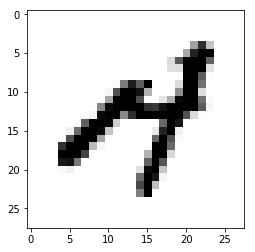

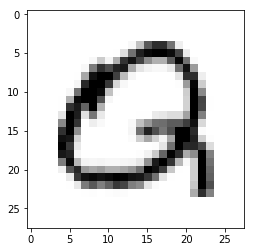

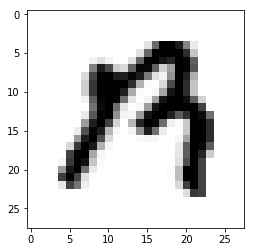

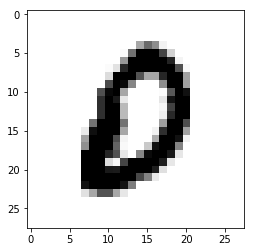

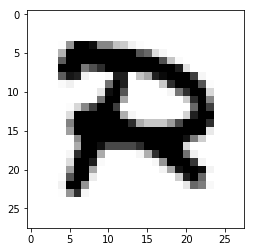

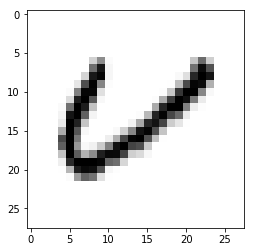

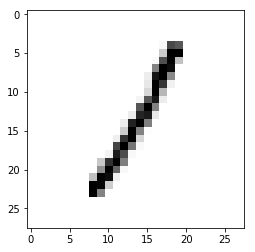

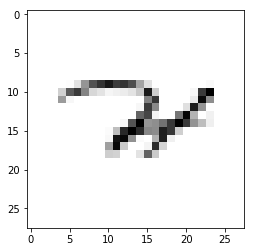

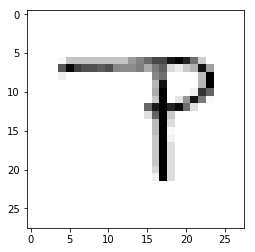

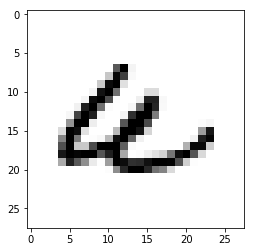

In [81]:
epochs = 10
train_X = torch.from_numpy(train_x)
train_X_resized = train_X.unsqueeze(1).to(dtype=torch.float)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

test_X=torch.from_numpy(test_x)
test_X_resized = test_X.unsqueeze(1).unsqueeze(1).to(dtype=torch.float)

test_Y=torch.tensor(test_y.values)

model = Net()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_X) for i in range(epochs + 1)]
run_test_train(epochs, 64, train_X_resized, train_Y, test_X_resized, test_Y, model, test_losses, train_losses, train_counter)

In [82]:
def plt_test_train_loss(train_losses, train_counter, test_losses, test_counter):
    fig = plt.figure()
    plt.plot(train_counter, train_losses, color='blue',zorder=1)
    plt.scatter(test_counter, test_losses, color='red',zorder=2)
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel('negative log likelihood loss')
    fig

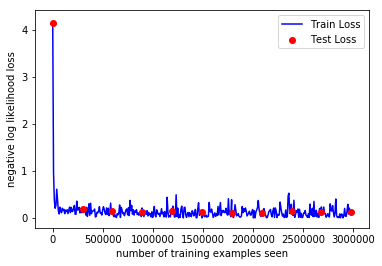

In [83]:
plt_test_train_loss(train_losses, train_counter, test_losses, test_counter)


Test set: Avg. loss: 31.2715, Accuracy: 2706/74490 (4%)

Epoch: 1

Test set: Avg. loss: 1.7469, Accuracy: 37051/74490 (50%)

Epoch: 2

Test set: Avg. loss: 1.6719, Accuracy: 39299/74490 (53%)

Epoch: 3

Test set: Avg. loss: 1.6449, Accuracy: 39533/74490 (53%)

Epoch: 4

Test set: Avg. loss: 1.5487, Accuracy: 42012/74490 (56%)

Epoch: 5

Test set: Avg. loss: 1.5160, Accuracy: 42012/74490 (56%)

Epoch: 6

Test set: Avg. loss: 1.6350, Accuracy: 41265/74490 (55%)

Epoch: 7

Test set: Avg. loss: 1.6561, Accuracy: 40360/74490 (54%)

Epoch: 8

Test set: Avg. loss: 1.7204, Accuracy: 37857/74490 (51%)

Epoch: 9

Test set: Avg. loss: 1.6806, Accuracy: 39097/74490 (52%)

Epoch: 10

 Ex: Pred is 13

 Ex: Pred is 17

 Ex: Pred is 19

 Ex: Pred is 15

 Ex: Pred is 23

 Ex: Pred is 12

 Ex: Pred is 0

 Ex: Pred is 16

 Ex: Pred is 23

 Ex: Pred is 14

Test set: Avg. loss: 1.5823, Accuracy: 42167/74490 (57%)



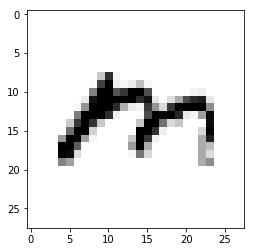

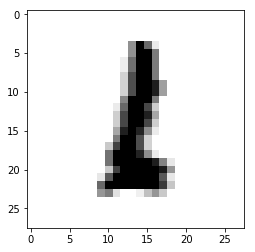

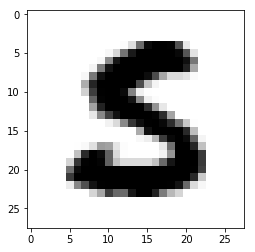

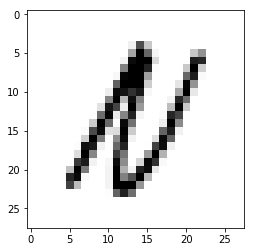

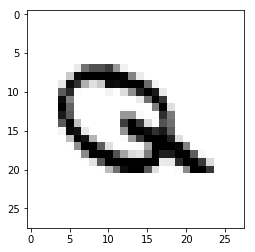

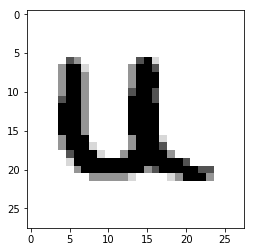

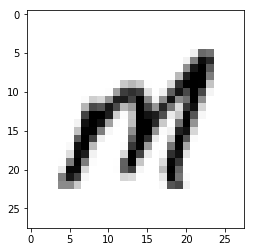

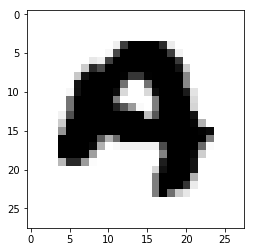

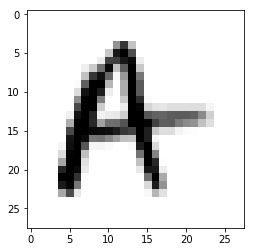

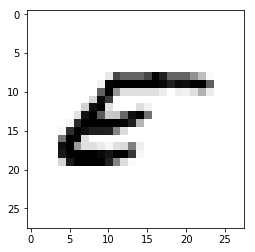

In [89]:
epochs = 10
train_X = torch.from_numpy(train_x)
train_X_resized = train_X.unsqueeze(1).to(dtype=torch.float)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

test_X=torch.from_numpy(test_x)
test_X_resized = test_X.unsqueeze(1).unsqueeze(1).to(dtype=torch.float)

test_Y=torch.tensor(test_y.values)

model = Model()
train_losses_2 = []
train_counter_2 = []
test_losses_2 = []
test_counter_2 = [i*len(train_X) for i in range(epochs + 1)]
run_test_train(epochs, 64, train_X_resized, train_Y, test_X_resized, test_Y, model, test_losses_2, train_losses_2, train_counter_2)

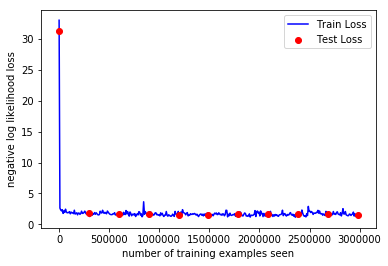

In [90]:
plt_test_train_loss(train_losses_2, train_counter_2, test_losses_2, test_counter_2)